<a href="https://colab.research.google.com/github/shivi8302/OIBSIP/blob/main/EDA_Task1_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Set Styles

In [ ]:
sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

##LOAD THE DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [ ]:
import pandas as pd
df = pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#BASIC OVERVIEW

In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn:\n", df.columns)
print("\nInfo:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (99457, 10)

Column:
 Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None

Missing Values:
 invoice_no        0
customer_id       0
gender        

# SUMMARY STATISTICS

In [ ]:
print("\nSummary:\n", df.describe(include = "all"))


Summary:
        invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN         8           NaN   
top       I232867     C273973  Female           NaN  Clothing           NaN   
freq            1           1   59482           NaN     34487           NaN   
mean          NaN         NaN     NaN     43.427089       NaN      3.003429   
std           NaN         NaN     NaN     14.990054       NaN      1.413025   
min           NaN         NaN     NaN     18.000000       NaN      1.000000   
25%           NaN         NaN     NaN     30.000000       NaN      2.000000   
50%           NaN         NaN     NaN     43.000000       NaN      3.000000   
75%           NaN         NaN     NaN     56.000000       NaN      4.000000   
max           NaN         NaN     NaN     69.000000       NaN      5.000000   

               price payment_method invo

# ADD A TOTAL SPEND COLUMN

In [ ]:
df["total_spend"] = df["quantity"]*df["price"]

#CONVERT INVOICE_DATE TO DATETIME

In [ ]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst = True)

#EXPLORATORY ANALYSIS

###Gender Distrubution

/tmp/ipython-input-3269388363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "gender", palette = 'hls')


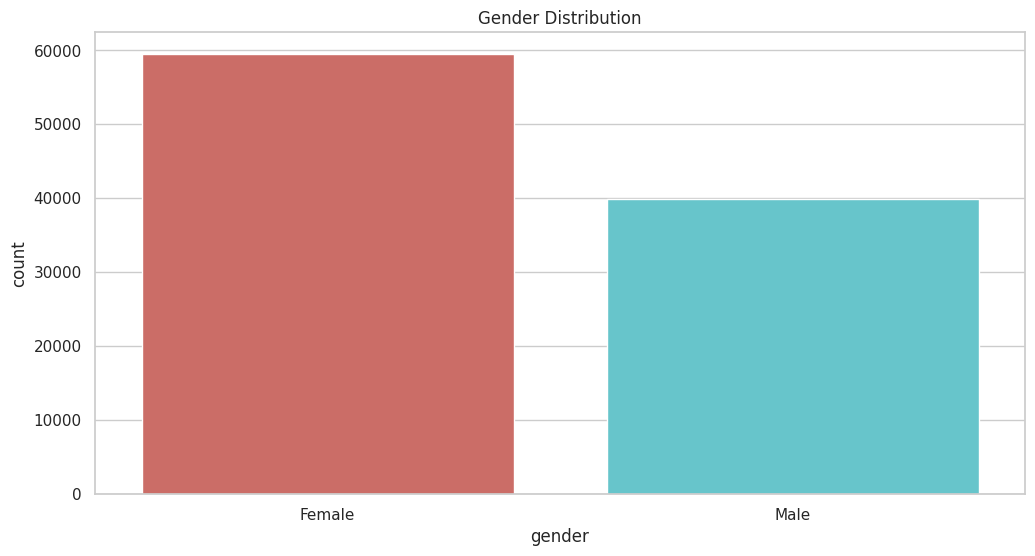

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = "gender", palette = 'hls')
plt.title("Gender Distribution")
plt.show()

###Age Distribution

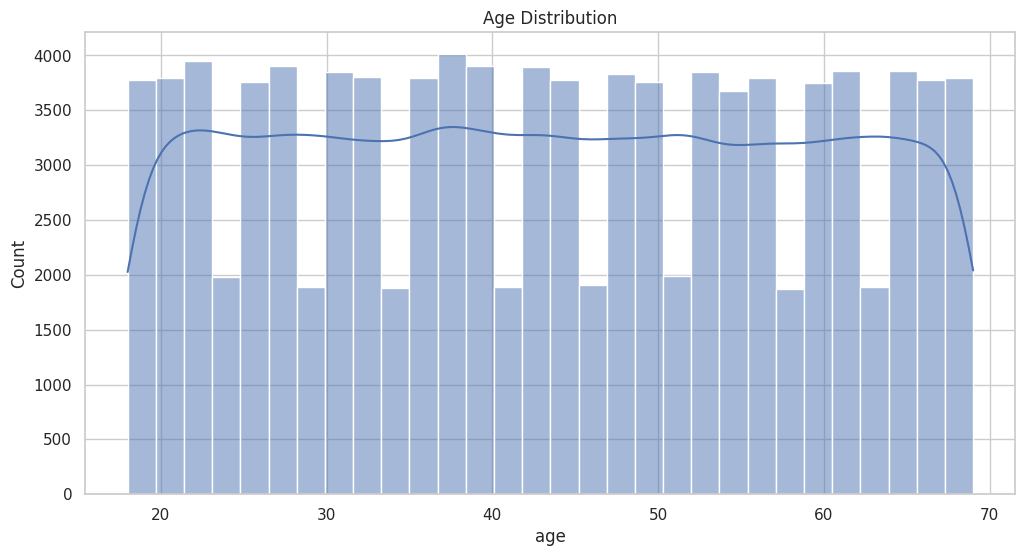

In [ ]:
sns.histplot(data = df, x = "age", bins = 30, kde = True,)
plt.title("Age Distribution")
plt.show()

###Payment Method Distribution

/tmp/ipython-input-3606032291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "payment_method", palette = 'hls')


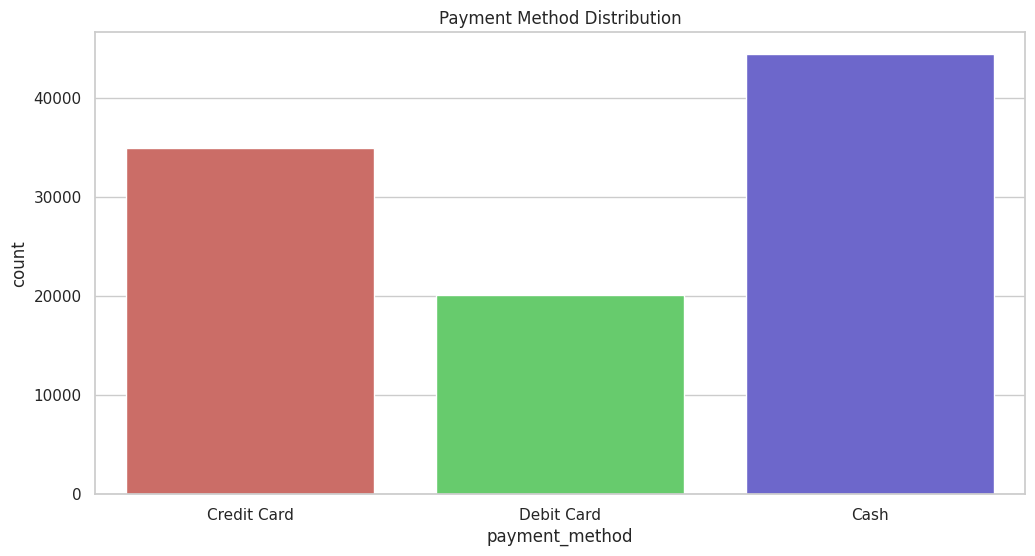

In [ ]:
sns.countplot(data = df, x = "payment_method", palette = 'hls')
plt.title("Payment Method Distribution")
plt.show()

###Product Category Popularity

/tmp/ipython-input-2138901466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y = "category", order = df["category"].value_counts().index, palette = "coolwarm")


<function matplotlib.pyplot.show(close=None, block=None)>

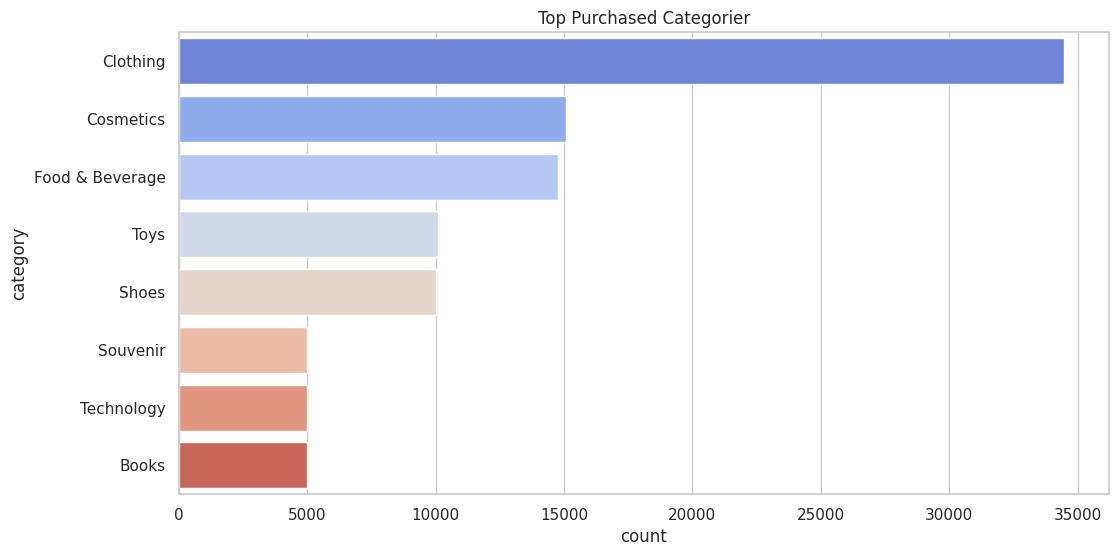

In [ ]:
sns.countplot(data = df, y = "category", order = df["category"].value_counts().index, palette = "coolwarm")
plt.title("Top Purchased Categorier")
plt.show

###Shopping Mall Activity

/tmp/ipython-input-2953374294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_malls.values, y = top_malls.index, palette = "viridis")


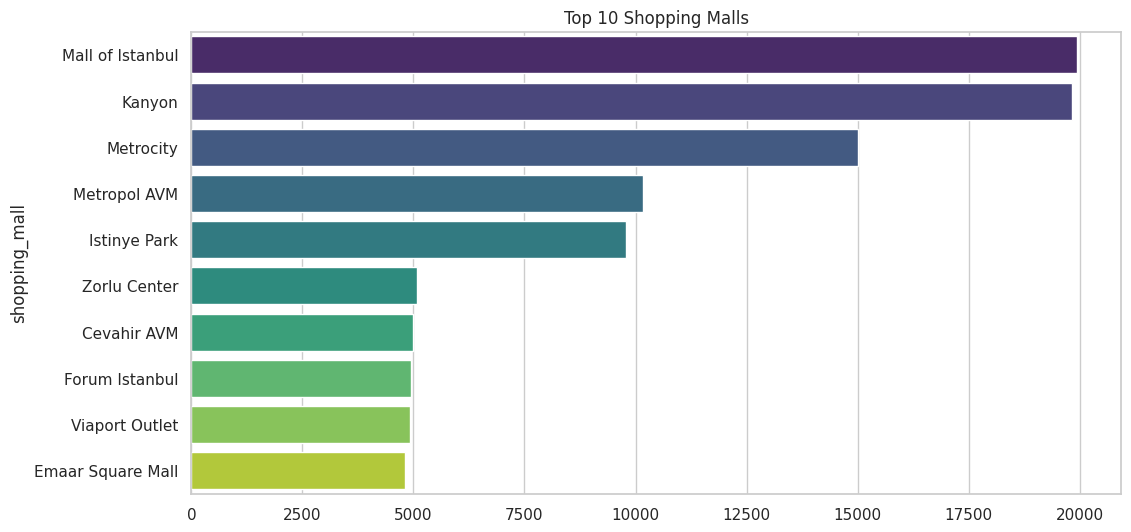

In [ ]:
top_malls = df["shopping_mall"].value_counts().head(10)
sns.barplot(x = top_malls.values, y = top_malls.index, palette = "viridis")
plt.title("Top 10 Shopping Malls")
plt.show()

###Age Vs. Spending

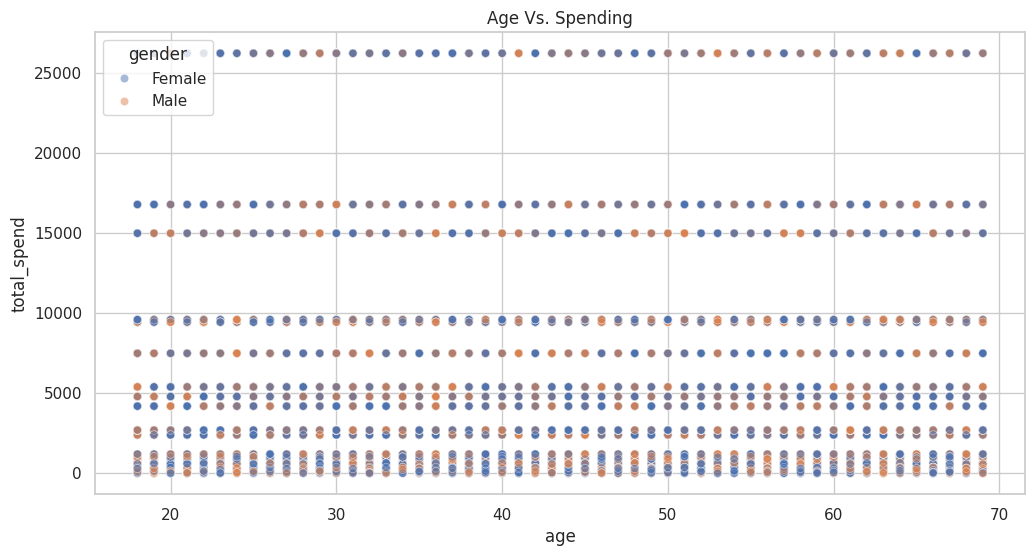

In [ ]:
sns.scatterplot(data = df, x = "age", y = "total_spend", hue = "gender", alpha = 0.5)
plt.title("Age Vs. Spending")
plt.show()

###Time-Based Analysis

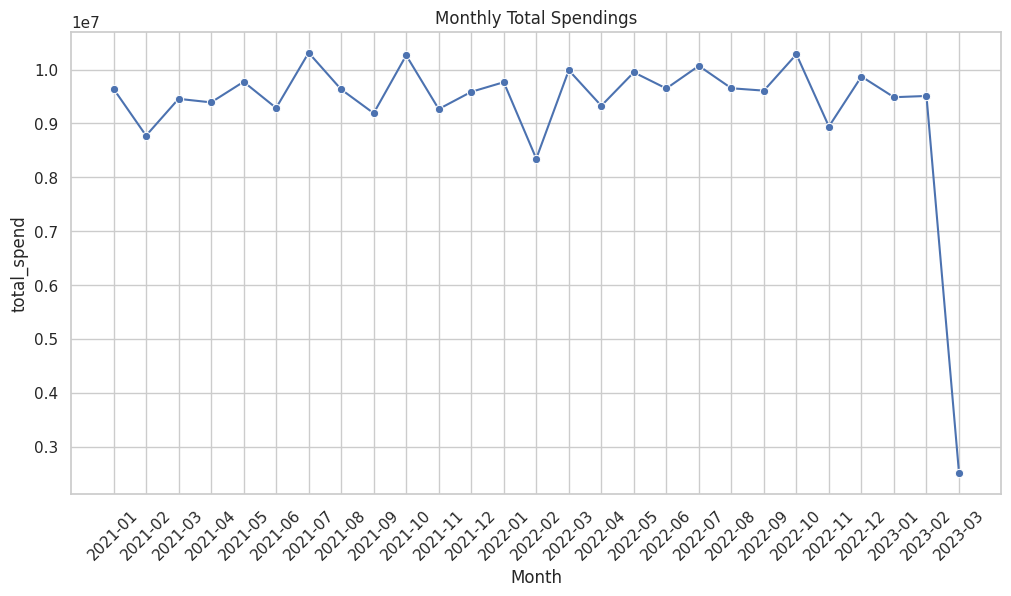

In [ ]:
df["Month"] = df["invoice_date"].dt.to_period("M")
monthly_spending = df.groupby("Month")["total_spend"].sum().reset_index()
monthly_spending["Month"] = monthly_spending["Month"].astype(str)
sns.lineplot(data = monthly_spending, x = "Month", y = "total_spend", marker = 'o')
plt.title("Monthly Total Spendings")
plt.xticks(rotation = 45)
plt.show()

###Average Spend By Gender

/tmp/ipython-input-3432489468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = avg_spend, x = "gender", y = "total_spend", palette = "pastel")


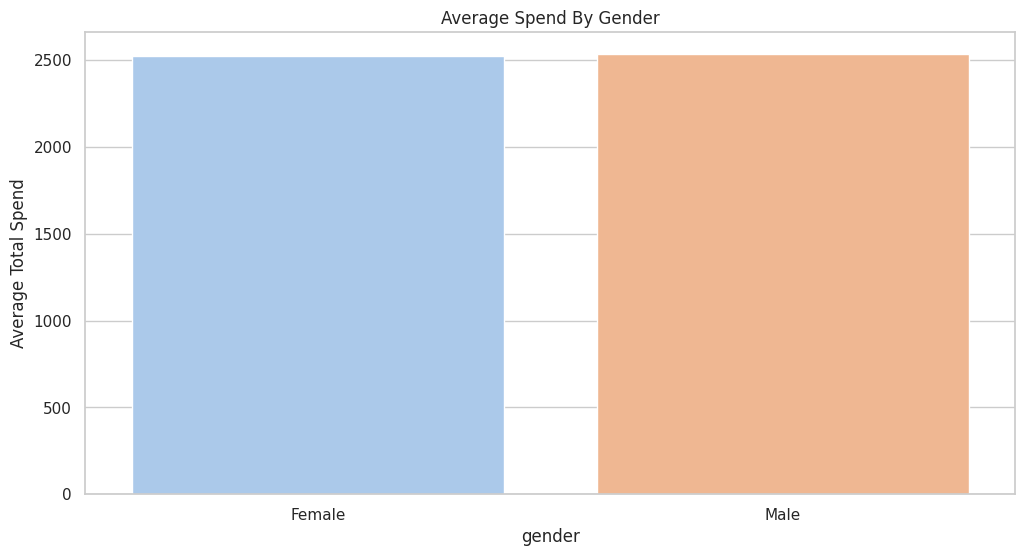

In [ ]:
avg_spend = df.groupby("gender")["total_spend"].mean().reset_index()
sns.barplot(data = avg_spend, x = "gender", y = "total_spend", palette = "pastel")
plt.title("Average Spend By Gender")
plt.ylabel("Average Total Spend")
plt.show()

###Saved Cleaned Dataset

In [ ]:
df.to_csv("cleaned_customer_shopping_data.csv", index = False)